In [2]:
## The purpose of this notebook is analyze and quantify western blot data. The input data folder is made by using Fiji to analyze the
## lanes of three independent western blot experiments. The raw images used are also available in the box folder. Process to calculate
## background and GAPDH normalized band intensities can be found in our methods

## Plots generated in this notebook are used to make Figures 6G

In [ ]:
## Import modules

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
## Import data
## data available at https://app.box.com/folder/171917844113?s=nuwov4kgb55mqfrr7j5a216ot78f4uxn
#data = pd.read_csv('../westernblot_files/wb_quant.csv',index_col = 0)

data = pd.read_csv('/Users/benh/Desktop/UCSF_Tetrad_Program/Gilbert_Lab/wb_quant/wb_quant.csv',index_col = 0)

In [6]:
data

,80224,80724,80824
dmso_20ug_DMAP1,0.266841,0.108682,0.428823
atri_20ug_DMAP1,0.934542,0.663708,0.820734
etop_20ug_DMAP1,0.543411,0.286580,0.573026
trrapko_20ug_DMAP1,NaN,0.442928,1.036256
dmso_20ug_TRRAP,0.181206,0.346801,0.498941
atri_20ug_TRRAP,0.547902,0.763139,0.994160
etop_20ug_TRRAP,0.391219,0.720026,0.964397
trrapko_20ug_TRRAP,NaN,0.098130,0.174383


(0.0, 1.0)

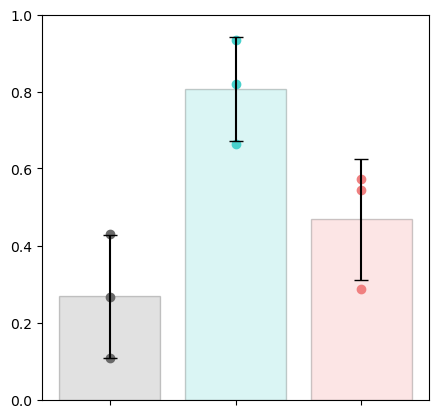

In [7]:
## plot average lane intensities for DMAP1 across the three experiments. Also represent data as a dot plot

col_map = ['dimgray','mediumturquoise','lightcoral']
plt.figure(figsize = (5,5))
plt.bar((0,1,2),(data.iloc[0,:].mean(),data.iloc[1,:].mean(),data.iloc[2,:].mean()),
        yerr = (data.iloc[0,:].std(),data.iloc[1,:].std(),data.iloc[2,:].std()), 
        tick_label = ['','' ,''],capsize = 5, edgecolor = 'black',color = col_map,alpha=0.2)

for i in range(3):
    plt.scatter((i,i,i),data.iloc[i,:],color = col_map[i])
plt.ylim(0,1)


In [17]:
stats.ttest_ind(data.iloc[4,:],data.iloc[5,:],alternative='two-sided')[1]

0.054449093127122664

(0.0, 1.0)

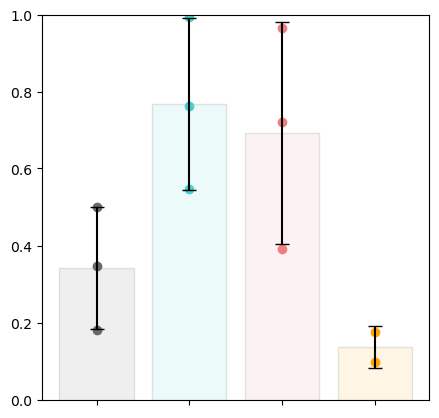

In [8]:
## plot average lane intensities for TRRAP across the three experiments. Also represent data as a dot plot

col_map = ['dimgray','mediumturquoise','lightcoral','orange']
plt.figure(figsize = (5,5))
plt.bar((0,1,2,3),(data.iloc[4,:].mean(),data.iloc[5,:].mean(),data.iloc[6,:].mean(),data.iloc[7,:].mean()),
        yerr = (data.iloc[4,:].std(),data.iloc[5,:].std(),data.iloc[6,:].std(),data.iloc[7,:].std()), 
        tick_label = ['','' ,'',''],capsize = 5, edgecolor = 'black',color = col_map,alpha=0.1)

for i,y in enumerate(range(4,8)):
    plt.scatter((i,i,i),data.iloc[y,:],color = col_map[i])


plt.ylim(0,1)
#plt.savefig('/Users/benh/Desktop/wb_quant/wb_trrap_quant.png',dpi=300)